In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use("ggplot")# use a style sheet for a matplotlib and seaborn style plots 
pd.set_option("display.max_columns", 200)
colors=["yellow", "violet", "pink","grey", "blue","orange","brown", "red","green"]

In [3]:
df1=pd.read_csv("/home/heewa/Desktop/crash_data/crash_data.csv")

/tmp/ipykernel_17058/1141081034.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("/home/heewa/Desktop/crash_data/crash_data.csv")


In [16]:
df1["Agency Name"].value_counts()

Agency Name
Montgomery County Police     137085
MONTGOMERY                    10659
Rockville Police Departme      9758
Gaithersburg Police Depar      7748
Takoma Park Police Depart      2958
Maryland-National Capital      1142
ROCKVILLE                       630
GAITHERSBURG                    390
TAKOMA                          157
MCPARK                           77
Name: count, dtype: int64

In [8]:
df1.shape

(170604, 43)

In [9]:
df1.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Person ID,Driver At Fault,Injury Severity,Circumstance,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,05/31/2019 03:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 3215 SPARTAN RD,NaN,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NaN,UNKNOWN,NaN,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,NO APPARENT INJURY,NaN,UNKNOWN,NaN,165AD539-A8C8-4004-AF73-B7DCAAA8B3CC,SUPERFICIAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,North,North,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)"
1,MCP1307000K,190024786,Montgomery County Police,Property Damage Crash,05/24/2019 05:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT,NaN,NaN,NaN,CLEAR,NaN,DAYLIGHT,NaN,NaN,NaN,6208FA7B-5DC4-4B54-AD60-0C06DFE2AE81,Yes,NO APPARENT INJURY,NaN,NOT DISTRACTED,XX,10239493-D667-42F9-A3D2-820FE184CB6C,FUNCTIONAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,Unknown,Unknown,0,No,No,0,UNK,UNK,NaN,39.199047,-77.250743,"(39.19904667, -77.25074333)"
2,MCP2846008X,230034260,Montgomery County Police,Property Damage Crash,07/17/2023 10:45:00 AM,County,SELFRIDGE RD,County,RANDOLPH RD,NaN,NaN,NaN,OTHER,CLEAR,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,UNKNOWN,NaN,9ACC5A7E-47A1-438F-BF0E-40B0A8632055,Yes,NO APPARENT INJURY,NaN,INATTENTIVE OR LOST IN THOUGHT,MD,8B61B8E0-5473-4C78-A654-6029684ABD03,SUPERFICIAL,SEVEN OCLOCK,SEVEN OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,East,East,35,No,No,2003,FORD,TK,NO MISUSE,39.054588,-77.085974,"(39.05458848, -77.08597423)"
3,MCP32610017,230034668,Montgomery County Police,Property Damage Crash,07/20/2023 11:40:00 PM,Maryland (State),MUNCASTER MILL RD,County,SHADY GROVE RD,NaN,NaN,NaN,OTHER,NaN,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,NaN,NaN,E611A3F8-5F7D-465B-8DE0-3814027998F1,No,NO APPARENT INJURY,NaN,NOT DISTRACTED,MD,1A592482-AF1F-49CE-8554-77EF7C55966B,SUPERFICIAL,ELEVEN OCLOCK,ELEVEN OCLOCK,PASSENGER CAR,MAKING RIGHT TURN,South,East,45,No,No,2023,TOYT,CP,NO MISUSE,39.148721,-77.147111,"(39.14872076, -77.14711061)"
4,EJ78520081,230033429,Gaithersburg Police Depar,Property Damage Crash,07/13/2023 05:40:00 PM,Municipality,PERRY PKWY,Unknown,ENT TO SHOPPING CENTER,NaN,NaN,NaN,SAME DIR REAR END,NaN,DRY,DAYLIGHT,NO CONTROLS,NaN,NaN,3C7F6951-1701-44DC-9824-88DF4E32352E,Yes,NO APPARENT INJURY,NaN,LOOKED BUT DID NOT SEE,MD,C2EF337E-5881-48ED-9B06-36D0BE00557C,SUPERFICIAL,TWELVE OCLOCK,TWELVE OCLOCK,"MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4...",MOVING CONSTANT SPEED,Unknown,Unknown,25,No,No,2001,KENWORTH,TRUCK,NaN,39.149085,-77.210731,"(39.14908542, -77.21073135)"


In [10]:
df1.sample(5)

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Person ID,Driver At Fault,Injury Severity,Circumstance,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
81168,MCP3058001J,180017452,Montgomery County Police,Property Damage Crash,04/10/2018 04:20:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 1283 SEVEN LOCKS RD,NaN,NaN,OPPOSITE DIRECTION SIDESWIPE,CLEAR,NaN,DAYLIGHT,NO CONTROLS,NaN,NaN,06023A8C-0D8E-4EB7-8F67-D888561616E0,Yes,NO APPARENT INJURY,NaN,INATTENTIVE OR LOST IN THOUGHT,NaN,78F88760-61BA-400D-BD04-27212A0CBFCA,UNKNOWN,UNKNOWN,UNKNOWN,NaN,UNKNOWN,Unknown,Unknown,5,No,No,0,UNKNOWN,UNKNOWN,NaN,39.065660,-77.159412,"(39.06566, -77.15941167)"
71616,MCP3153000R,180062010,Montgomery County Police,Property Damage Crash,12/12/2018 09:50:00 AM,Maryland (State),UNIVERSITY BLVD W,County,GABEL ST,NaN,NaN,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,87022DB6-2E47-4FC7-8FB2-2EA64E085A7E,No,NO APPARENT INJURY,"N/A, VISION OBSTRUCTION (INCL. BLINDED BY SUN)",NOT DISTRACTED,MD,4074D107-7BB9-455E-A763-FE8E03D71A6C,SUPERFICIAL,EIGHT OCLOCK,EIGHT OCLOCK,TRANSIT BUS,STARTING FROM LANE,North,East,35,No,No,2009,GILL,BU,NO MISUSE,39.033308,-77.024023,"(39.03330833, -77.02402333)"
35080,DM8423001Y,190025944,Takoma Park Police Depart,Property Damage Crash,04/20/2019 03:00:00 AM,Maryland (State),FLOWER AVE,Municipality,DOMER AVE,NaN,TAKOMA PARK,NaN,UNKNOWN,CLEAR,DRY,DARK LIGHTS ON,NO CONTROLS,NaN,NaN,CBC9FB7E-B855-4334-8DEF-99A648572AFE,Yes,NO APPARENT INJURY,NaN,UNKNOWN,MD,15422CF7-6214-4868-8E6C-49E1B3CAC8B5,UNKNOWN,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,UNKNOWN,East,East,25,No,No,2011,HONDA,CIVIC,NaN,38.996378,-77.003152,"(38.99637833, -77.00315167)"
158421,MCP12210022,16011845,MONTGOMERY,Property Damage Crash,03/10/2016 08:16:00 AM,County,MUDDY BRANCH RD,Maryland (State),GREAT SENECA HWY,NaN,NaN,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,4C9090DB-5CAF-4EC8-9BCF-99533BB3D066,No,NO APPARENT INJURY,NaN,NOT DISTRACTED,MD,6FD7F2D6-8A1E-4DF4-B40C-D573A2688809,DISABLING,ELEVEN OCLOCK,ELEVEN OCLOCK,(SPORT) UTILITY VEHICLE,MOVING CONSTANT SPEED,North,North,45,No,No,2011,FORD,ESCAPE,NO MISUSE,39.110365,-77.217210,"(39.110365, -77.21721)"
82049,MCP9113001T,16044835,Montgomery County Police,Injury Crash,09/02/2016 09:52:00 AM,Maryland (State),VEIRS MILL RD,County,TURKEY BRANCH PKWY,NaN,NaN,NaN,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NaN,7C2B1B3A-B690-4BEC-A5D8-77E67BD5BE7B,Yes,SUSPECTED MINOR INJURY,NaN,NOT DISTRACTED,MD,C7756C33-C1B5-4853-A0DC-2850D5192B97,FUNCTIONAL,TWELVE OCLOCK,TWELVE OCLOCK,PICKUP TRUCK,MOVING CONSTANT SPEED,West,West,40,No,No,2008,FORD,F150,NaN,39.060458,-77.089012,"(39.06045833, -77.08901167)"


In [11]:
df1.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [12]:
df1.dtypes

Report Number                      object
Local Case Number                  object
Agency Name                        object
ACRS Report Type                   object
Crash Date/Time                    object
Route Type                         object
Road Name                          object
Cross-Street Type                  object
Cross-Street Name                  object
Off-Road Description               object
Municipality                       object
Related Non-Motorist               object
Collision Type                     object
Weather                            object
Surface Condition                  object
Light                              object
Traffic Control                    object
Driver Substance Abuse             object
Non-Motorist Substance Abuse       object
Person ID                          object
Driver At Fault                    object
Injury Severity                    object
Circumstance                       object
Driver Distracted By              

In [13]:
df1.describe(include="all")

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Person ID,Driver At Fault,Injury Severity,Circumstance,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
count,170604,170604,170604,170604,170604,153765,154790,153732,154776,15812,18947,5422,170030,157350,150646,169188,145316,139546,4287,170604,170604,170604,30999,170604,160767,170604,170291,170448,170348,167980,170225,167942,167942,170604.000000,170604,170604,170604.000000,170580,170538,136672,170604.000000,170604.000000,170604
unique,95987,107898,10,3,93662,10,3791,10,6671,11221,20,12,18,12,11,8,11,11,15,170604,3,5,197,19,74,170604,7,16,16,30,22,5,5,NaN,2,2,NaN,1868,6652,10,NaN,NaN,95154
top,MCP229800RC,200022715,Montgomery County Police,Property Damage Crash,12/10/2018 06:10:00 PM,Maryland (State),GEORGIA AVE,County,GEORGIA AVE,PARKING LOT,ROCKVILLE,PEDESTRIAN,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NONE DETECTED,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,NO APPARENT INJURY,"RAIN, SNOW, WET",NOT DISTRACTED,MD,165AD539-A8C8-4004-AF73-B7DCAAA8B3CC,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,North,North,NaN,No,No,NaN,TOYOTA,4S,NO MISUSE,NaN,NaN,"(38.953, -77.338)"
freq,10,10,137085,108438,11,76394,10786,84739,2096,132,9236,3847,55319,115799,119586,115426,68001,121467,3834,1,91634,139933,12019,105841,141609,1,61776,67389,67145,118028,66566,46441,47232,NaN,169868,167942,NaN,22963,13682,122312,NaN,NaN,45
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.550028,NaN,NaN,1966.381785,NaN,NaN,NaN,39.083072,-77.112348,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.059808,NaN,NaN,340.687251,NaN,NaN,NaN,0.072046,0.098564,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,37.720000,-79.486000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,2006.000000,NaN,NaN,NaN,39.024294,-77.189252,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,2011.000000,NaN,NaN,NaN,39.074923,-77.105429,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,2015.000000,NaN,NaN,NaN,39.139708,-77.039628,NaN


Data Preparation 
Dropping irrelevant columns and rows 
Identifying duplicated columns 
Renaming Columns Feature Creation

In [4]:
#Three approaches to drop columns
#method 1
df=df1[[#'Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', #'Route Type', #'Road Name', 
       #'Cross-Street Type',
       #'Cross-Street Name', 'Off-Road Description', #'Municipality',
       #'Related Non-Motorist',
       #'Collision Type', 'Weather',
       #'Surface Condition',
       # 'Light', #'Traffic Control',
       #'Driver Substance Abuse', 'Non-Motorist Substance Abuse', #'Person ID',
       'Driver At Fault', 'Injury Severity', #'Circumstance',
       'Driver Distracted By', #'Drivers License State', #'Vehicle ID',
       'Vehicle Damage Extent', #'Vehicle First Impact Location',
       #'Vehicle Second Impact Location', 
       'Vehicle Body Type',
       'Vehicle Movement', #'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', #'Equipment Problems', 
       'Latitude',
       'Longitude', 'Location']].copy()
print(df.columns)

Index(['Crash Date/Time', 'Driver At Fault', 'Injury Severity',
       'Driver Distracted By', 'Vehicle Damage Extent', 'Vehicle Body Type',
       'Vehicle Movement', 'Speed Limit', 'Driverless Vehicle',
       'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')


In [15]:
#method 2
#df=df1.drop(columns=['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type','Municipality','Person ID','Vehicle Continuing Dir', 'Vehicle Going Dir','Vehicle First Impact Location','Vehicle Second Impact Location'],inplace=True)   
#print(df.columns)


In [16]:
#method 3
#df=df1.drop(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type','Municipality','Person ID','Vehicle Continuing Dir', 'Vehicle Going Dir','Vehicle First Impact Location','Vehicle Second Impact Location'],axis=1)   
#print("removing columns by drop:\n", df.columns)

In [5]:
#Renaming columns
df=df.rename(columns={ 
    "Crash Date/Time":"Crash_Date_Time",
    "Route Type":"Route_Type",
    "Driver At Fault":"Driver_At_Fault",
    "Injury Severity":"Injury_Severity",
    "Driver Distracted By":"Driver_Distracted_By", 
    "Vehicle Damage Extent":"Vehicle_Damage_Extent",
    "Vehicle Body Type":"Vehicle_Body_Type",
    "Vehicle Movement":"Vehicle_Movement", 
    "Speed Limit":"Speed_Limit", 
    "Driverless Vehicle":"Driverless_Vehicle",
    "Parked Vehicle":"Parked_Vehicle",
    "Vehicle Year":"Vehicle_Year", 
    "Vehicle Make":"Vehicle_Make",
    "Vehicle Model":"Vehicle_Model"  }) 
df.columns

Index(['Crash_Date_Time', 'Driver_At_Fault', 'Injury_Severity',
       'Driver_Distracted_By', 'Vehicle_Damage_Extent', 'Vehicle_Body_Type',
       'Vehicle_Movement', 'Speed_Limit', 'Driverless_Vehicle',
       'Parked_Vehicle', 'Vehicle_Year', 'Vehicle_Make', 'Vehicle_Model',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [18]:
#Missing values
#print("missing values:\n",df.isna().sum() )
#print(df.shape)
# Checking for columns with missing values
missing_values=df.columns[np.sum(df.isna())!=0]
print("columns with missing values:", missing_values)  

columns with missing values: Index(['Vehicle_Damage_Extent', 'Vehicle_Body_Type', 'Vehicle_Movement',
       'Vehicle_Make', 'Vehicle_Model'],
      dtype='object')


/home/heewa/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [19]:
no_missing_values=df.columns[np.sum(df.isna())==0]
print("columns with no missing values:", no_missing_values)

columns with no missing values: Index(['Crash_Date_Time', 'Driver_At_Fault', 'Injury_Severity',
       'Driver_Distracted_By', 'Speed_Limit', 'Driverless_Vehicle',
       'Parked_Vehicle', 'Vehicle_Year', 'Latitude', 'Longitude', 'Location'],
      dtype='object')


In [20]:
#Duplicating values
#print("duplicated rows:\n",df[df.duplicated(keep=False)])
print(df.loc[df.duplicated(keep=False)]) #give all rows that have duplicates

               Crash_Date_Time Driver_At_Fault     Injury_Severity  \
12296   11/28/2021 01:20:00 PM              No  NO APPARENT INJURY   
25660   11/08/2022 01:27:00 PM              No  NO APPARENT INJURY   
39573   05/09/2019 02:39:00 PM             Yes  NO APPARENT INJURY   
41941   11/28/2018 08:15:00 PM              No  NO APPARENT INJURY   
49008   05/09/2021 03:16:00 AM         Unknown  NO APPARENT INJURY   
61915   06/19/2016 10:00:00 PM             Yes  NO APPARENT INJURY   
65984   11/28/2018 08:15:00 PM              No  NO APPARENT INJURY   
82797   08/10/2016 04:48:00 PM              No  NO APPARENT INJURY   
84964   11/08/2022 01:27:00 PM              No  NO APPARENT INJURY   
85518   08/10/2016 04:48:00 PM              No  NO APPARENT INJURY   
86612   12/17/2016 02:45:00 PM             Yes  NO APPARENT INJURY   
96094   05/09/2021 03:16:00 AM         Unknown  NO APPARENT INJURY   
111809  11/28/2021 01:20:00 PM              No  NO APPARENT INJURY   
113110  06/19/2016 1

In [21]:
#duplicated_df=df.loc[df.duplicated(keep="first")] #this keep the first occurrence of each set of duplicated rows #this mark all duplicates except the first occurrence as "True".
df_HOND=df.query('Vehicle_Make=="HOND"')# 'query' is used to filter a df based on specific condition(typically filter rows based on condition in a column
print(df_HOND[df_HOND.duplicated(keep=False)])


               Crash_Date_Time Driver_At_Fault     Injury_Severity  \
12296   11/28/2021 01:20:00 PM              No  NO APPARENT INJURY   
111809  11/28/2021 01:20:00 PM              No  NO APPARENT INJURY   

          Driver_Distracted_By Vehicle_Damage_Extent        Vehicle_Body_Type  \
12296   LOOKED BUT DID NOT SEE             DISABLING  (SPORT) UTILITY VEHICLE   
111809  LOOKED BUT DID NOT SEE             DISABLING  (SPORT) UTILITY VEHICLE   

        Vehicle_Movement  Speed_Limit Driverless_Vehicle Parked_Vehicle  \
12296   MAKING LEFT TURN           35                 No             No   
111809  MAKING LEFT TURN           35                 No             No   

        Vehicle_Year Vehicle_Make Vehicle_Model   Latitude  Longitude  \
12296           2018         HOND            TK  39.148316 -77.206712   
111809          2018         HOND            TK  39.148316 -77.206712   

                         Location  
12296   (39.1483165, -77.2067125)  
111809  (39.1483165, -77.20

In [22]:
#dropping duplicate rows based on specific columns
print("df_be:",df.shape)
df_drop_on_columns=df.drop_duplicates(subset=["Vehicle_Make", "Speed_Limit"],keep="first")
print("df_af:",df_drop_on_columns.shape)

df_be: (170604, 16)
df_af: (4798, 16)


In [6]:
# removing duplicate2
df=df.loc[~df.duplicated()].reset_index(drop=True).copy()
print(df.shape)

(170595, 16)


In [7]:
# Changing the data type from object to datetime for the OCCURRED_ON_DATE column

df['Crash_Date_Time']=pd.to_datetime(df["Crash_Date_Time"])
print("Crash_Date_Time dtype:",df['Crash_Date_Time'].dtypes)

/tmp/ipykernel_17058/198520859.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Crash_Date_Time']=pd.to_datetime(df["Crash_Date_Time"])


Crash_Date_Time dtype: datetime64[ns]


In [8]:
#extract datetime components from the Crash_Date_Time column
df["Year"]=df['Crash_Date_Time'].dt.year
df["Month"]=df['Crash_Date_Time'].dt.month
df["Day_of_Week"]=df['Crash_Date_Time'].dt.day_name()
df["Hour"]=df['Crash_Date_Time'].dt.hour
print(df[["Crash_Date_Time", "Year", "Month", "Day_of_Week", "Hour"]].head())

      Crash_Date_Time  Year  Month Day_of_Week  Hour
0 2019-05-31 15:00:00  2019      5      Friday    15
1 2019-05-24 17:00:00  2019      5      Friday    17
2 2023-07-17 10:45:00  2023      7      Monday    10
3 2023-07-20 23:40:00  2023      7    Thursday    23
4 2023-07-13 17:40:00  2023      7    Thursday    17


In [26]:
df.columns

Index(['Crash_Date_Time', 'Driver_At_Fault', 'Injury_Severity',
       'Driver_Distracted_By', 'Vehicle_Damage_Extent', 'Vehicle_Body_Type',
       'Vehicle_Movement', 'Speed_Limit', 'Driverless_Vehicle',
       'Parked_Vehicle', 'Vehicle_Year', 'Vehicle_Make', 'Vehicle_Model',
       'Latitude', 'Longitude', 'Location', 'Year', 'Month', 'Day_of_Week',
       'Hour'],
      dtype='object')

In [27]:
df.describe() # summary information on the numeric columns

,Crash_Date_Time,Speed_Limit,Vehicle_Year,Latitude,Longitude,Year,Month,Hour
count,170595,170595.000000,170595.000000,170595.000000,170595.000000,170595.000000,170595.000000,170595.000000
mean,2019-04-08 18:33:26.097951488,32.550251,1966.414643,39.083073,-77.112349,2018.754067,6.682107,13.345930
min,2015-01-01 00:30:00,0.000000,0.000000,37.720000,-79.486000,2015.000000,1.000000,0.000000
25%,2017-01-11 15:23:00,25.000000,2006.000000,39.024295,-77.189255,2017.000000,4.000000,9.000000
50%,2019-01-14 14:16:00,35.000000,2011.000000,39.074923,-77.105430,2019.000000,7.000000,14.000000
75%,2021-08-06 05:14:00,40.000000,2015.000000,39.139711,-77.039628,2021.000000,10.000000,17.000000
max,2023-12-06 21:54:00,75.000000,9999.000000,39.990414,-75.527708,2023.000000,12.000000,23.000000
std,NaN,11.059580,340.596302,0.072047,0.098565,2.577128,3.450580,5.262939


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170595 entries, 0 to 170594
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Crash_Date_Time        170595 non-null  datetime64[ns]
 1   Driver_At_Fault        170595 non-null  object        
 2   Injury_Severity        170595 non-null  object        
 3   Driver_Distracted_By   170595 non-null  object        
 4   Vehicle_Damage_Extent  170283 non-null  object        
 5   Vehicle_Body_Type      167973 non-null  object        
 6   Vehicle_Movement       170216 non-null  object        
 7   Speed_Limit            170595 non-null  int64         
 8   Driverless_Vehicle     170595 non-null  object        
 9   Parked_Vehicle         170595 non-null  object        
 10  Vehicle_Year           170595 non-null  int64         
 11  Vehicle_Make           170571 non-null  object        
 12  Vehicle_Model          170529 non-null  obje

In [8]:
df=df.sort_values(by='Crash_Date_Time',ascending=False).reset_index(drop=True) #'reset_index()'adds a new index column and keep the old index. to dropthe old index, we ude 'drop=True'
df.head()

,Crash_Date_Time,Driver_At_Fault,Injury_Severity,Driver_Distracted_By,Vehicle_Damage_Extent,Vehicle_Body_Type,Vehicle_Movement,Speed_Limit,Driverless_Vehicle,Parked_Vehicle,Vehicle_Year,Vehicle_Make,Vehicle_Model,Latitude,Longitude,Location,Year,Month,Day_of_Week,Hour
0,2023-12-06 21:54:00,No,NO APPARENT INJURY,NOT DISTRACTED,DESTROYED,PASSENGER CAR,ACCELERATING,50,No,No,2015,HOND,SD,39.158013,-77.192055,"(39.15801333, -77.192055)",2023,12,Wednesday,21
1,2023-12-06 21:54:00,Yes,NO APPARENT INJURY,TALKING OR LISTENING TO CELLULAR PHONE,DESTROYED,PASSENGER CAR,ACCELERATING,50,No,No,2018,HOND,4S,39.158013,-77.192055,"(39.15801333, -77.192055)",2023,12,Wednesday,21
2,2023-12-06 19:05:00,Yes,NO APPARENT INJURY,LOOKED BUT DID NOT SEE,SUPERFICIAL,PASSENGER CAR,MAKING RIGHT TURN,25,No,No,2022,NFLY,548,38.985911,-77.094933,"(38.98591127, -77.09493278)",2023,12,Wednesday,19
3,2023-12-06 17:53:00,Yes,NO APPARENT INJURY,LOOKED BUT DID NOT SEE,FUNCTIONAL,PASSENGER CAR,MAKING LEFT TURN,35,No,No,2018,BMW,330I,39.090122,-77.044890,"(39.09012167, -77.04489)",2023,12,Wednesday,17
4,2023-12-06 17:53:00,No,NO APPARENT INJURY,NOT DISTRACTED,FUNCTIONAL,PASSENGER CAR,MAKING RIGHT TURN,35,No,No,2017,FORD,ESCAPE,39.090122,-77.044890,"(39.09012167, -77.04489)",2023,12,Wednesday,17


#Feature Understanding
##plotting Feature Distribution(potential outliers are detected)
###Histogram
###KDE
###Boxplot

In [30]:
#ax=df["Year"].value_counts().sort_index()\
      # .plot(kind="bar", title="Crash Count per Year", color=colors)
#ax.set_xlabel("Year")
#ax.set_ylabel("Counts")             
#plt.show()

In [31]:

monthly_crashes=df.groupby(["Year","Month"]).size().reset_index(name="Crash Count")
monthly_crashes.head(10)
 
 

,Year,Month,Crash Count
0,2015,1,1617
1,2015,2,1567
2,2015,3,1438
3,2015,4,1528
4,2015,5,1846
5,2015,6,1581
6,2015,7,1506
7,2015,8,1548
8,2015,9,1794
9,2015,10,2004


In [32]:
#monthly_crashes=df.groupby(["Year","Month"]).size().reset_index(name="Crash Count")
#monthly_crashes=monthly_crashes[~((monthly_crashes["Year"]==2023)&(monthly_crashes["Month"]==12))]
#sns.set(style="whitegrid")
#plt.figure(figsize=(8,6))
#palette=sns.color_palette("Set1",n_colors=len(monthly_crashes["Year"].unique()))
#for i,year in enumerate(monthly_crashes["Year"].unique()):
    #year_data=monthly_crashes[monthly_crashes["Year"]==year]
    #plt.plot(year_data["Month"],year_data["Crash Count"],label=str(year),marker="o",linestyle="-", linewidth=1.5,color=palette[i])
#plt.xlabel("Month",fontsize="small",weight="bold")
#plt.ylabel("Number of Crashes",fontsize="small",weight="bold")
#plt.legend(title="Year", loc="center right", fontsize="small", bbox_to_anchor=(1.2,0.5))
#plt.xticks(range(1,13),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct", "Nov","Dec"],fontsize="small")
#plt.title("Monthly Crash Count over years",weight="bold")
#plt.show()    
    

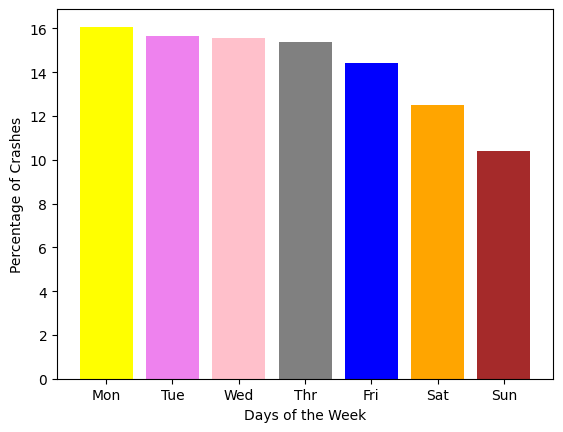

In [62]:
#day_data=df["Day_of_Week"].value_counts(normalize=True).reset_index(name="Crash_Percentage")
#plt.bar(day_data["Day_of_Week"],day_data["Crash_Percentage"]*100,color=colors) 
#plt.xlabel("Days of the Week")
#plt.ylabel("Percentage of Crashes")
#plt.xticks(range(7),["Mon","Tue","Wed","Thr","Fri","Sat","Sun"])
#plt.show()

###code2
#daily_crash_count=df["Crash_Date_Time"].groupby(df["Day_of_Week"]).count()
#print(daily_crash_count)
#total_crash=daily_crash_count.sum()
#daily_crash_percent=(daily_crash_count/total_crash)*100
#print(daily_crash_percent)



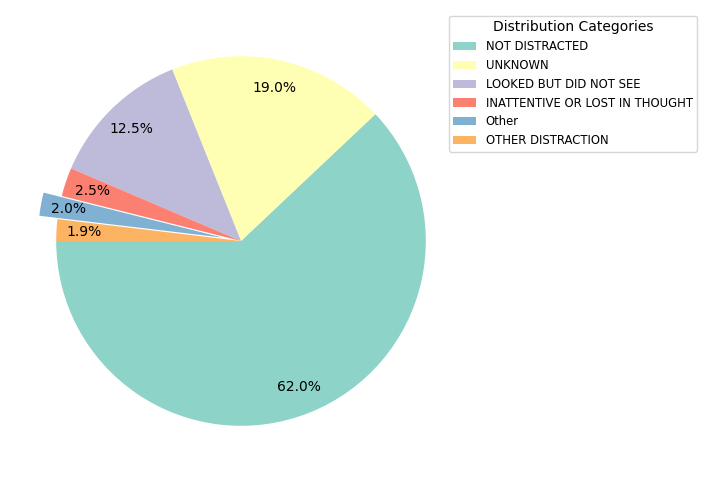

In [90]:
driver_distraction_counts = df["Driver_Distracted_By"].value_counts()
#print(driver_distraction_counts)
# Identify distractions with counts below 1000
below_1000_distractions = driver_distraction_counts[driver_distraction_counts < 1000].index

# Create a new category "Other" for distractions below 1000 using conditions
df['Categorized_Distraction'] = df['Driver_Distracted_By'].where(~df['Driver_Distracted_By'].isin(below_1000_distractions), 'Other')

# Calculate percentages after categorizing
percentage_counts = df['Categorized_Distraction'].value_counts(normalize=True) * 100
plt.figure(figsize=(6,6))
colors=plt.cm.Set3.colors
explode=[0.1 if cat=="Other" else 0 for cat in percentage_counts.index]
plt.pie(percentage_counts, labels=None, autopct="%1.1f%%", startangle=180,pctdistance=0.85,rotatelabels=True, explode=explode,colors=colors)
plt.legend(percentage_counts.index, title="Distribution Categories",fontsize="small", loc="upper right", bbox_to_anchor=(1.5,1))

plt.show()

In [33]:
df['Vehicle_Body_Type'].value_counts(ascending=False).head(10)

Vehicle_Body_Type
PASSENGER CAR                                                118024
(SPORT) UTILITY VEHICLE                                       15852
PICKUP TRUCK                                                   6739
VAN                                                            4921
TRANSIT BUS                                                    3617
SCHOOL BUS                                                     2934
POLICE VEHICLE/NON EMERGENCY                                   2095
OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)               1899
CARGO VAN/LIGHT TRUCK 2 AXLES (OVER 10,000LBS (4,536 KG))      1844
OTHER                                                          1531
Name: count, dtype: int64

In [34]:
#df['Injury_Severity'].value_counts(ascending=False)

In [35]:
#day_week=df["Day_of_Week"].value_counts(normalize=True).reset_index(name="Crash_Percentage")
#day_week.head(10)


In [36]:
daily_crash_count=df["Crash_Date_Time"].groupby(df["Day_of_Week"]).count()
print(daily_crash_count)
total_crash=daily_crash_count.sum()
daily_crash_percent=(daily_crash_count/total_crash)*100
print(daily_crash_percent)


Day_of_Week
Friday       27433
Monday       24620
Saturday     21343
Sunday       17719
Thursday     26521
Tuesday      26695
Wednesday    26264
Name: Crash_Date_Time, dtype: int64
Day_of_Week
Friday       16.080776
Monday       14.431841
Saturday     12.510918
Sunday       10.386588
Thursday     15.546177
Tuesday      15.648173
Wednesday    15.395527
Name: Crash_Date_Time, dtype: float64


In [37]:
limited_df = df.groupby('Day_of_Week')['Injury_Severity'].value_counts().unstack().fillna(0)
print(limited_df)
limited_df.dtypes

Injury_Severity  FATAL INJURY  NO APPARENT INJURY  POSSIBLE INJURY  \
Day_of_Week                                                          
Friday                     22               22616             2736   
Monday                     24               20113             2554   
Saturday                   26               17583             2053   
Sunday                     34               14408             1805   
Thursday                   16               21734             2687   
Tuesday                    15               21917             2784   
Wednesday                  16               21553             2707   

Injury_Severity  SUSPECTED MINOR INJURY  SUSPECTED SERIOUS INJURY  
Day_of_Week                                                        
Friday                             1855                       204  
Monday                             1707                       222  
Saturday                           1495                       186  
Sunday                       

Injury_Severity
FATAL INJURY                int64
NO APPARENT INJURY          int64
POSSIBLE INJURY             int64
SUSPECTED MINOR INJURY      int64
SUSPECTED SERIOUS INJURY    int64
dtype: object

In [38]:

#plt.figure(figsize=(12,8))
#sns.violinplot(x="Injury_Severity", y="Speed_Limit", data=df, hue="Driver_At_Fault")
#plt.title("Violin Plot of Speed Limit by Injury Severity",weight="bold")
#sns.set_theme(style="white")
#plt.grid(False)
#plt.xticks(fontsize=8, rotation=60)
#plt.yticks(fontsize=8)
#plt.show()               

In [11]:

print("vehicle damage extent:\n", df["Vehicle_Damage_Extent"].value_counts())
print("vehicle body type:\n", df["Vehicle_Body_Type"].value_counts())

vehicle damage extent:
 Vehicle_Damage_Extent
DISABLING      61774
FUNCTIONAL     44640
SUPERFICIAL    43514
DESTROYED       7509
UNKNOWN         6554
NO DAMAGE       6191
OTHER            101
Name: count, dtype: int64
vehicle body type:
 Vehicle_Body_Type
PASSENGER CAR                                                118024
(SPORT) UTILITY VEHICLE                                       15852
PICKUP TRUCK                                                   6739
VAN                                                            4921
TRANSIT BUS                                                    3617
SCHOOL BUS                                                     2934
POLICE VEHICLE/NON EMERGENCY                                   2095
OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)               1899
CARGO VAN/LIGHT TRUCK 2 AXLES (OVER 10,000LBS (4,536 KG))      1844
OTHER                                                          1531
POLICE VEHICLE/EMERGENCY                                       

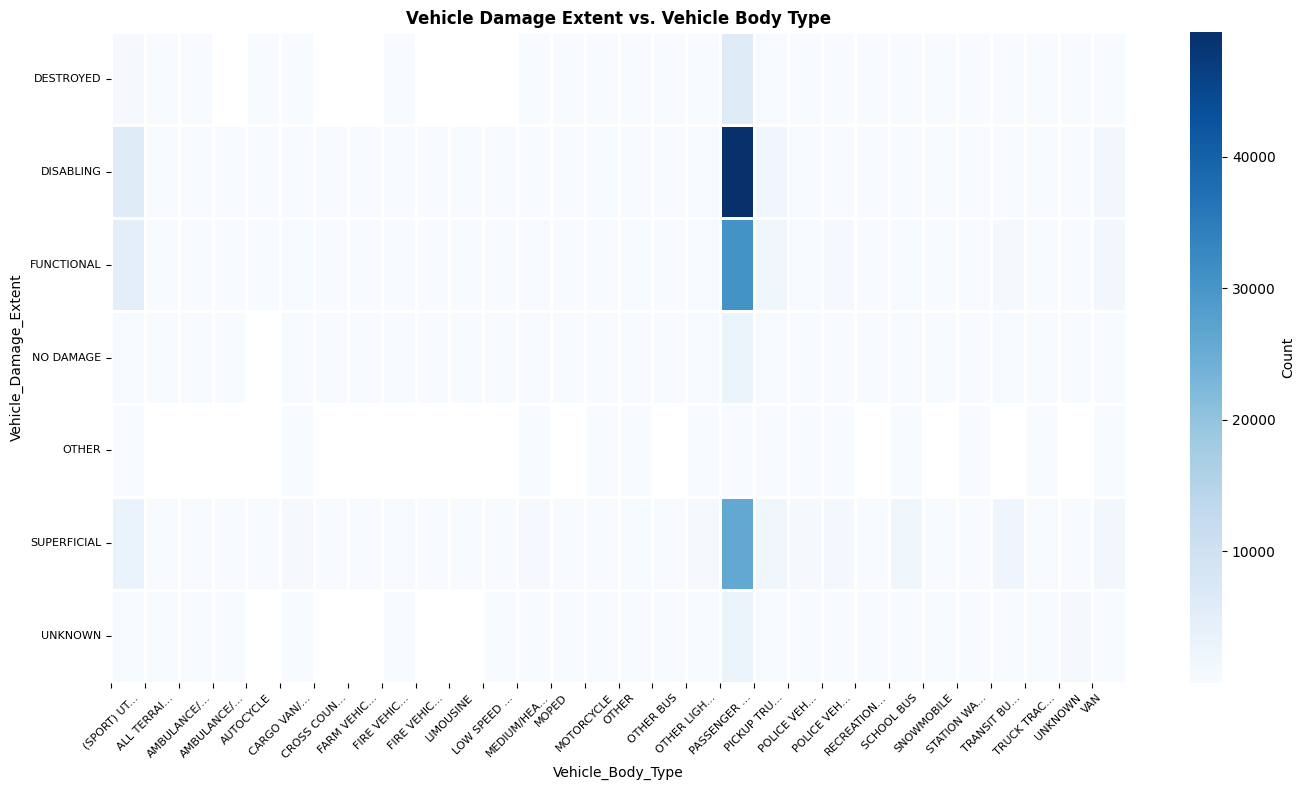

In [38]:
heatmap_data = df.groupby(['Vehicle_Damage_Extent', 'Vehicle_Body_Type']).size().unstack()

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=False, fmt='.0f', cbar_kws={'label': 'Count'},linewidths=.9)
#sns.heatmap(heatmap_data, cmap='YlOrBr', annot=False, fmt='.0f', cbar_kws={'label': 'Count'}, #linewidths=.5, linecolor='lightgray')
# Customize y-axis ticks
plt.yticks(rotation=0, fontsize=8)

# Customize x-axis ticks (adjust as needed)
x_ticks = [label[:10] + '...' if len(label) > 10 else label for label in heatmap_data.columns]
plt.xticks(ticks=range(len(x_ticks)), labels=x_ticks, rotation=45, fontsize=8, ha='center')
plt.title('Vehicle Damage Extent vs. Vehicle Body Type', weight="bold", )
plt.tight_layout()
plt.show()

In [43]:
from scipy.stats import chi2_contingency
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Create a contingency table
contingency_table = pd.crosstab(df['Vehicle_Damage_Extent'], df['Vehicle_Body_Type'])

# Calculate Cramér's V
cramers_value = cramers_v(contingency_table.values)

# Display Cramér's V
print(f"Cramér's V: {cramers_value}")


Cramér's V: 0.17908640261652148


In [46]:
!pip install plotly

In [10]:
import plotly.express as px
# Create a contingency table
contingency_table = pd.crosstab(df['Vehicle_Damage_Extent'], df['Vehicle_Body_Type'])

# Create an interactive heatmap with hover information
fig = px.imshow(contingency_table.values,
                labels=dict(x="Vehicle Body Type", y="Vehicle Damage Extent", color="Count"),
                x=list(contingency_table.columns),
                y=list(contingency_table.index),
                color_continuous_scale="Blues",
                title='Vehicle Damage Extent vs. Vehicle Body Type - Contingency Table')

# Show the figure
fig.show()

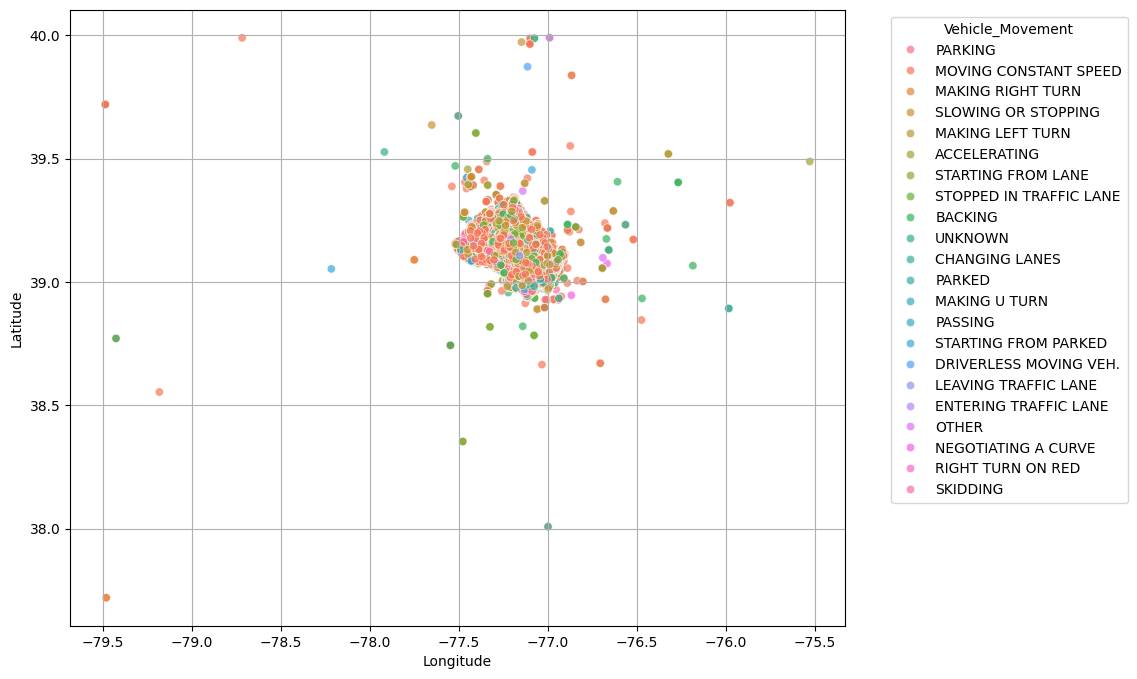

In [15]:
plt.figure(figsize=(10,8))
sns.set_palette("viridis")
sns.scatterplot(x="Longitude",y="Latitude",hue="Vehicle_Movement",data=df,alpha=0.7)
#plt.scatter(df["Longitude"], df["Latitude"],alpha=0.5)
#plt.title("Scatter Plot of Latitude vs. Longitude", weight="bold")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Vehicle_Movement", bbox_to_anchor=(1.05,1),loc="upper left")
plt.grid(True)
plt.show()

In [14]:
df["Vehicle_Movement"].value_counts()

Vehicle_Movement
MOVING CONSTANT SPEED      66563
SLOWING OR STOPPING        24297
STOPPED IN TRAFFIC LANE    18262
MAKING LEFT TURN           16457
ACCELERATING                9571
BACKING                     5747
MAKING RIGHT TURN           5366
CHANGING LANES              4643
STARTING FROM LANE          4474
UNKNOWN                     2786
PARKED                      2662
PARKING                     1921
STARTING FROM PARKED        1881
MAKING U TURN               1215
PASSING                      937
OTHER                        894
ENTERING TRAFFIC LANE        816
SKIDDING                     681
NEGOTIATING A CURVE          538
RIGHT TURN ON RED            262
LEAVING TRAFFIC LANE         206
DRIVERLESS MOVING VEH.        37
Name: count, dtype: int64

In [ ]:
import geopandas as gpd

# Load world map shapefile
world = gpd.read_file('path/to/your/shapefile/ne_110m_admin_0_countries.shp')

# Merge DataFrame with world map data
merged_data = world.merge(df, left_on='name', right_on='Country_Column')

# Plot the map with markers
fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot(ax=ax, color='lightgrey')

# Add markers for each data point
for index, row in df.iterrows():
    plt.scatter(row['Longitude'], row['Latitude'], s=50, color='red', alpha=0.7)
    plt.text(row['Longitude'] + 1, row['Latitude'], row['Location'], fontsize=8)

plt.title('Geographical Distribution of Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()